# MEng-Team-Project-ML

This notebook contains the initial analysis of JSON files generated \
by our ML system as of December 2022 (refer to git commit for exact \
version).

## Load Dataset

### Load COCO Classes

In [112]:
import yaml

COCO_YAML_PATH = "../yolov7-segmentation/data/coco.yaml"

def load_coco_classes(coco_settings):
    with open(coco_settings, "r") as stream:
        try:
            coco_data = yaml.safe_load(stream)
            coco_data = coco_data["names"]
            return coco_data
        except yaml.YAMLError as exc:
            print(exc)

COCO_CLASSES = load_coco_classes(COCO_YAML_PATH)

### Load Pre-Saved Analytical Dataset

In [113]:
import os
dataset_dir = \
    "C:/Users/win8t/OneDrive/Desktop/projects/" + \
    "MEng-Team-Project-ML/yolov7-segmentation/runs/predict-seg/exp/labels"
fis       = os.listdir(dataset_dir)
fis.sort(key=len)
info_fis    = [fi for fi in fis if "_info" in fi]
track_fis   = [fi for fi in fis if "_track" in fi]
other_fis   = [fi for fi in fis if not "_track" in fi and not "_info" in fi]
frame_count = max([int(fi.split("_")[-1].split(".json")[0]) for fi in other_fis])
print("len(info_fis), len(track_fis), len(other_fis):", len(info_fis), len(track_fis), len(other_fis))
frame_count

len(info_fis), len(track_fis), len(other_fis): 261 261 261


261

In [114]:
import json

def load_frame(frame):
    # frame += 1
    
    get_frame   = lambda i: (info_fis[i], track_fis[i], other_fis[i])
    first_frame = get_frame(frame)
    
    # print(os.path.join(dataset_dir, first_frame[0]))
    with open(os.path.join(dataset_dir, first_frame[0])) as f:
        first_frame_info = json.loads(f.read())

    # print(os.path.join(dataset_dir, first_frame[1]))
    with open(os.path.join(dataset_dir, first_frame[1])) as f:
        first_frame_tracks = json.loads(f.read())

    # print(os.path.join(dataset_dir, first_frame[2]))
    with open(os.path.join(dataset_dir, first_frame[2])) as f:
        lines = f.read().split("\n")
        lines = list(filter(None, lines))
        content = "[" + ",".join(lines) + "]"
        first_frame_base = json.loads(content)
    
    return first_frame_info, first_frame_tracks, first_frame_base

In [115]:
frames = []
for cur_frame in range(frame_count):
    frames.append(load_frame(cur_frame))
print("len(frames):", len(frames))

len(frames): 261


## Data Analysis

## Object Total Count (per Frame)

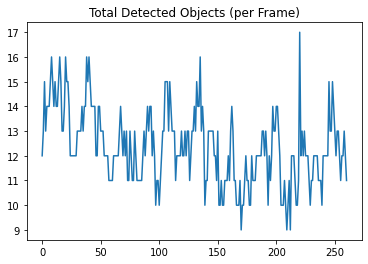

In [119]:
import matplotlib.pyplot as plt
obj_counts = [len(frame[-1])
              for frame in frames]
plt.title("Total Detected Objects (per Frame)")
plt.plot(obj_counts)

### Object Count

In [116]:
last_frame_info, last_frame_track, last_frame_base = frames[50]
print(len(last_frame_info["infos"]), len(last_frame_track["routes"]), len(last_frame_base))

13 16 13


In [117]:
last_frame_info
#last_frame_track
#last_frame_base

{'infos': [{'bbox': {'x1': '124', 'y1': '80', 'x2': '151', 'y2': '128'},
   'label': '29',
   'anchor': {'x': '138', 'y': '104'}},
  {'bbox': {'x1': '128', 'y1': '128', 'x2': '163', 'y2': '166'},
   'label': '28',
   'anchor': {'x': '145', 'y': '147'}},
  {'bbox': {'x1': '101', 'y1': '192', 'x2': '152', 'y2': '236'},
   'label': '24',
   'anchor': {'x': '126', 'y': '214'}},
  {'bbox': {'x1': '40', 'y1': '132', 'x2': '49', 'y2': '155'},
   'label': '18',
   'anchor': {'x': '44', 'y': '143'}},
  {'bbox': {'x1': '161', 'y1': '82', 'x2': '171', 'y2': '95'},
   'label': '15',
   'anchor': {'x': '166', 'y': '88'}},
  {'bbox': {'x1': '151', 'y1': '70', 'x2': '167', 'y2': '88'},
   'label': '11',
   'anchor': {'x': '159', 'y': '79'}},
  {'bbox': {'x1': '167', 'y1': '107', 'x2': '204', 'y2': '124'},
   'label': '10',
   'anchor': {'x': '185', 'y': '115'}},
  {'bbox': {'x1': '61', 'y1': '117', 'x2': '68', 'y2': '136'},
   'label': '9',
   'anchor': {'x': '65', 'y': '127'}},
  {'bbox': {'x1': '68